# 환경 구성
- tensorflow, keras 버전 변경
- GPU 확인
- Mount
- git clone을 통해 데이터 가져오기


In [49]:
!pip install tensorflow==1.15
!pip install keras==2.3

In [50]:
import tensorflow as tf
import keras

In [51]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.3


In [52]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [53]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# !git clone https://github.com/chulminkw/DLCV.git

In [55]:
!ls

audrey01.jpg	beatles02.jpg	 EPL01.jpg	  stopsign02.png
baseball01.jpg	beatles03.jpg	 john_wick01.jpg  wave01.jpg
beatles01.jpg	beatles_low.jpg  stopsign01.jpg   wave02.jpg


In [56]:
%cd /content/DLCV/data/image
!ls

/content/DLCV/data/image
audrey01.jpg	beatles02.jpg	 EPL01.jpg	  stopsign02.png
baseball01.jpg	beatles03.jpg	 john_wick01.jpg  wave01.jpg
beatles01.jpg	beatles_low.jpg  stopsign01.jpg   wave02.jpg


# Selective Search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출



## Selective Search를 설치하고 이미지를 로드

In [57]:
!pip install selectivesearch

img shape: (450, 375, 3)


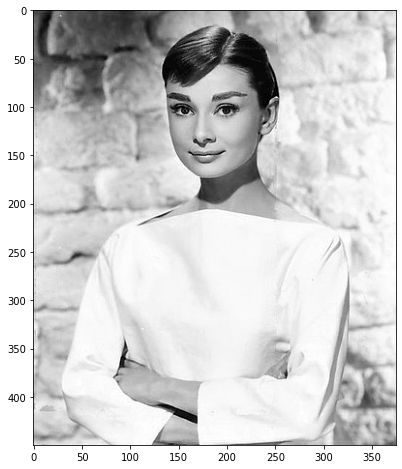

In [58]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/DLCV/data/image/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.show()

In [59]:
# selectivesearch.selective_search()는 이미지의 Region Proposal 정보를 반환
# scale : algorithm. 이미지의 해상도와 미세한 디테일에 따라..
# min_size는 bounding box의 최소 크기. 줄여나가다 min_size에 도달하면 종료. 즉, min_size이하의 bounding box는 제외!
_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 2000)

print(type(regions), len(regions))

<class 'list'> 41


- 추천 후보 bounding box는 41개

반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있다. 개별 딕셔너리내 Key값의 의미
- rect : x, y 시작 좌표와 너비, 높이 값을 가지며 이 값이 **Detected Object 후보를 나타내는 bounding box** (x, y, width, height)
- size : bounding box의 **크기**
- labels : 해당 rect로 지정된 bounding box 내에 있는 object들의 고유 **ID**
- 아래로 내려갈수록 너비와 높이 값이 큰 Bounding box이며 하나의 bounding box에 여러 개의 object가 있을 확률이 커진다.

In [60]:
regions

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


- 점점 Bounding box의 size가 커지면서 합쳐진다.

In [61]:
# rect 정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


## Bounding Box 시각화

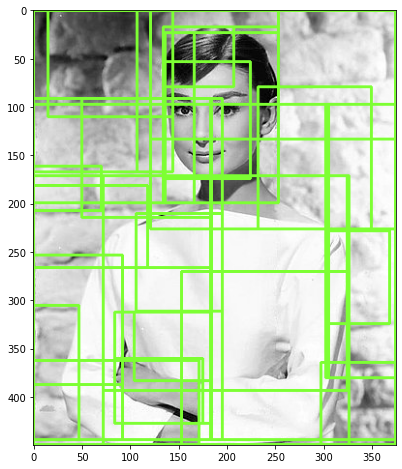

In [62]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지의 좌상단 좌표, 우하단 좌표, box컬러색, 두께 등을 인자로 입력하면 원본 이미지에 box를 그려줌

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb_copy)
plt.show()



### bounding box의 크기가 큰 후보만 추출

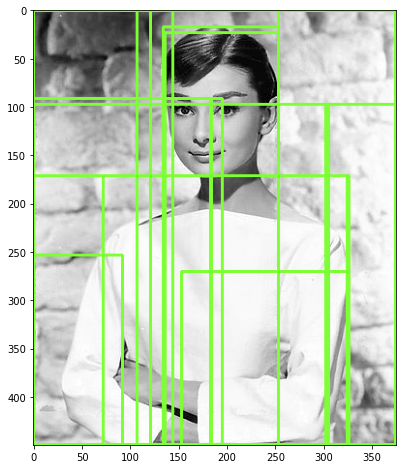

In [63]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  botton = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color = green_rgb, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb_copy)
plt.show()

# IOU

입력 인자로 후보 박스와 실제 박스를 받아서 IoU를 계산하는 함수 생성

In [73]:
import numpy as np

def compute_iou(cand_box, gt_box): # (x1, y1), (x2, y2)
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.minimum(cand_box[2], gt_box[2])
  y2 = np.minimum(cand_box[3], gt_box[3])

  intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

  cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
  gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
  union = cand_box_area + gt_box_area - intersection

  iou = intersection / union
  return iou

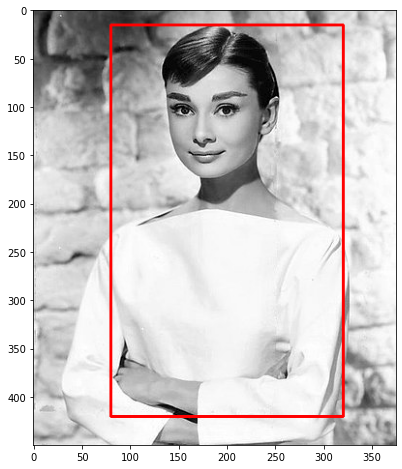

In [74]:
# 실제 Box(Ground Truth)의 좌표를 아래와 같다고 가정
gt_box = [80, 15, 320, 420]

img = cv2.imread('/content/DLCV/data/image/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.show()

In [75]:
import selectivesearch

_, regions = selectivesearch.selective_search(img_rgb, scale = 100, min_size = 2000)

print(type(regions), len(regions))

<class 'list'> 49


In [76]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
  print()
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  print('index:', index, 'iou:', iou)


index: 0 iou: 0.0

index: 1 iou: 0.07157955697118865

index: 2 iou: 0.1210762331838565

index: 3 iou: 0.9868621438869373

index: 4 iou: 0.9736213991769548

index: 5 iou: 0.08316872427983539

index: 6 iou: 0.04581275720164609

index: 7 iou: 0.16296296296296298

index: 8 iou: 0.15753086419753087

index: 9 iou: 0.25500649306267514

index: 10 iou: 0.10954732510288066

index: 11 iou: 0.1294238683127572

index: 12 iou: 0.12654320987654322

index: 13 iou: 0.0

index: 14 iou: 0.0

index: 15 iou: 0.5922222222222222

index: 16 iou: 0.0

index: 17 iou: 0.09247942386831276

index: 18 iou: 0.0

index: 19 iou: 0.0

index: 20 iou: 0.056790123456790124

index: 21 iou: 0.0

index: 22 iou: 0.0792283950617284

index: 23 iou: 0.0100807036195815

index: 24 iou: 0.0

index: 25 iou: 0.2580246913580247

index: 26 iou: 0.21185185185185185

index: 27 iou: 0.31656378600823043

index: 28 iou: 0.5922222222222222

index: 29 iou: 0.1210762331838565

index: 30 iou: 0.31656378600823043

index: 31 iou: 0.2755125384953

- 중복된 값들도 존재한다.

In [78]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 77, 167),
 (0, 0, 286, 167),
 (0, 0, 286, 199),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 17, 318, 432),
 (0, 51, 171, 398),
 (0, 51, 171, 398),
 (0, 51, 171, 398),
 (0, 51, 183, 398),
 (0, 51, 183, 398),
 (0, 51, 184, 398),
 (0, 51, 195, 398),
 (0, 253, 77, 150),
 (0, 253, 77, 191),
 (15, 0, 271, 51),
 (82, 17, 236, 401),
 (83, 0, 291, 449),
 (83, 18, 170, 181),
 (83, 18, 170, 181),
 (83, 91, 100, 123),
 (83, 171, 234, 246),
 (83, 171, 234, 246),
 (83, 171, 291, 278),
 (136, 23, 117, 176),
 (153, 366, 151, 51),
 (166, 23, 87, 176),
 (171, 413, 203, 36),
 (197, 0, 177, 420),
 (197, 18, 120, 132),
 (197, 18, 120, 209),
 (232, 79, 85, 148),
 (284, 0, 90, 420),
 (284, 0, 90, 420),
 (284, 0, 90, 420),
 (323, 105, 51, 248)]

img shape (450, 375, 3)
index: 3 iou: 0.9868621438869373 rectangle: (79, 14, 321, 421)
index: 4 iou: 0.9736213991769548 rectangle: (82, 17, 318, 418)
index: 13 iou: 0.5922222222222222 rectangle: (83, 171, 317, 417)
index: 24 iou: 0.5922222222222222 rectangle: (83, 171, 317, 417)
index: 40 iou: 0.7278538605032077 rectangle: (83, 0, 374, 449)
index: 41 iou: 0.6917107787281302 rectangle: (0, 17, 318, 449)
index: 42 iou: 0.5788263878136798 rectangle: (0, 0, 374, 449)
index: 43 iou: 0.5788263878136798 rectangle: (0, 0, 374, 449)
index: 44 iou: 0.5788263878136798 rectangle: (0, 0, 374, 449)


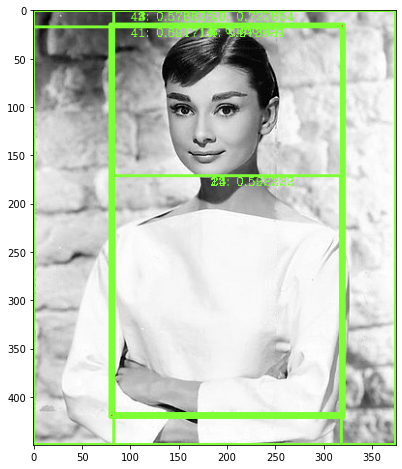

In [83]:
img = cv2.imread('/content/DLCV/data/image/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [80, 15, 320, 420]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color = red, thickness = 2)

for index, cand_box in enumerate(cand_rects):
  cand_box = list(cand_box)
  cand_box[2] += cand_box[0]
  cand_box[3] += cand_box[1]

  iou = compute_iou(cand_box, gt_box)

  if iou > 0.5:
    print('index:', index, 'iou:', iou, 'rectangle:', (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
    cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color = green_rgb, thickness = 2)
    text = "{}: {:2f}".format(index, iou)
    cv2.putText(img_rgb, text, (cand_box[0] + 100, cand_box[1] + 10), cv2.FONT_HERSHEY_COMPLEX, 0.4, color = green_rgb, thickness = 1)

plt.figure(figsize = (8, 8))
plt.imshow(img_rgb)
plt.show()
